In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import ensemble
import time

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [3]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
lfw.images.shape

(1140, 50, 37)

In [5]:
lfw.data.shape

(1140, 1850)

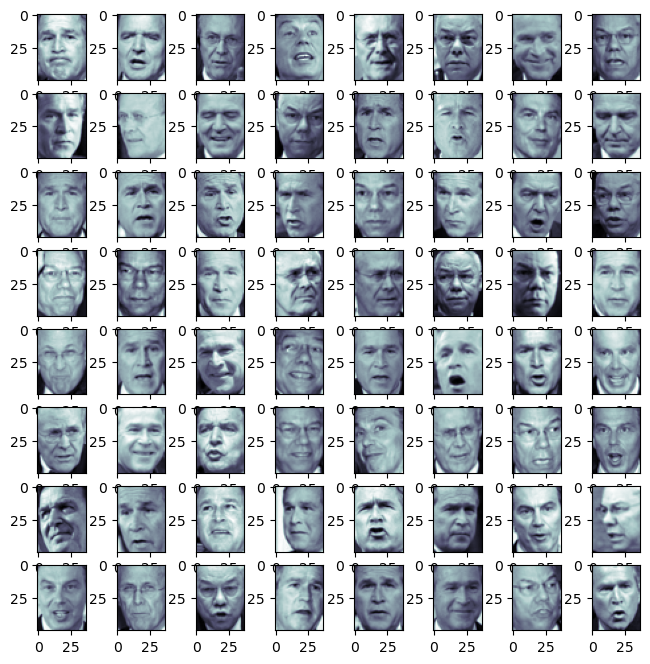

In [6]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) # row, column, index
    ax.imshow(lfw['images'][i], cmap = plt.cm.bone)
plt.show()

In [7]:
x = lfw.data
y = lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [8]:
pca = PCA()
pca.fit(x_train)

PCA()

In [9]:
pca.components_.shape

(855, 1850)

In [10]:
k = 0 
current_variance = 0
total = sum(pca.explained_variance_)
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k += 1
k

357

In [11]:
pca = PCA(n_components = k, whiten = True)
transfromed_data = pca.fit_transform(x_train)
transfromed_data.shape

(855, 357)

In [12]:
# restore the images from transformed data which lower dimensional data
x_approx = pca.inverse_transform(transfromed_data)
x_approx.shape

(855, 1850)

In [13]:
x_approx_images = x_approx.reshape((855, 50, 37))

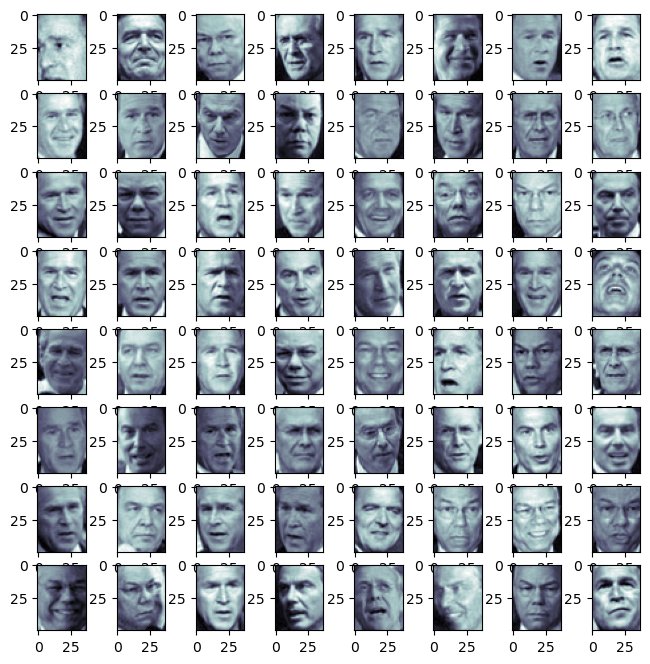

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) # row, column, index
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [15]:
eigen_vec = pca.components_
eigen_faces = eigen_vec.reshape((k,50,37))

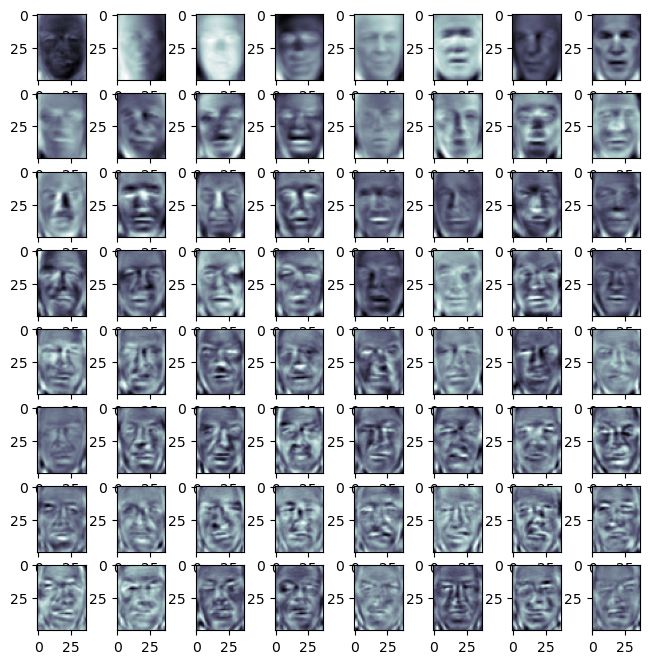

In [16]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) # row, column, index
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
plt.show()

In [18]:
x_train_pca = transfromed_data
x_test_pca = pca.transform(x_test)

In [22]:
# without pca
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train, y_train)
end = time.time()
print("time:", end-start)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

time: 1.9946496486663818
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        61
           1       0.86      0.17      0.28        36
           2       0.60      1.00      0.75       122
           3       1.00      0.19      0.32        31
           4       0.82      0.40      0.54        35

    accuracy                           0.67       285
   macro avg       0.83      0.49      0.53       285
weighted avg       0.76      0.67      0.62       285

[[ 43   0  18   0   0]
 [  5   6  25   0   0]
 [  0   0 122   0   0]
 [  0   1  21   6   3]
 [  2   0  19   0  14]]


In [ ]:
# with pca
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca, y_train)
end = time.time()
print("time:", end-start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))